# Regressão Linear - Salário x Anos de Experiência

**Fonte:** https://www.kaggle.com/datasets/abhishek14398/salary-dataset-simple-linear-regression/data

---

Exercício simples de Regressão Linear com algoritmo de ML com dataset de Salários x Anos de experiência.

---

### Conteúdo:
- Tratamento e processamento inicial dos dados.
- Análise dos dados e suas correlações.
- Visualização de distribuição.
- Treino e teste do modelo.
- MSE e MAE do modelo
- R² score do modelo
- Previsão de salários de acordo com os anos de experiência (novos valores).
- Visualização da previsão.

### Variáveis:
- ***YearsExperience***: anos de experiência.
- ***Salary***: salário.

In [1]:
import pandas as pd
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

#### Tratamento e processamento inicial dos dados:

In [2]:
df = pd.read_csv('salary.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       30 non-null     int64  
 1   YearsExperience  30 non-null     float64
 2   Salary           30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 852.0 bytes


In [4]:
df = df.drop('Unnamed: 0', axis=1)

In [5]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


#### Análise dos dados e suas correlações:

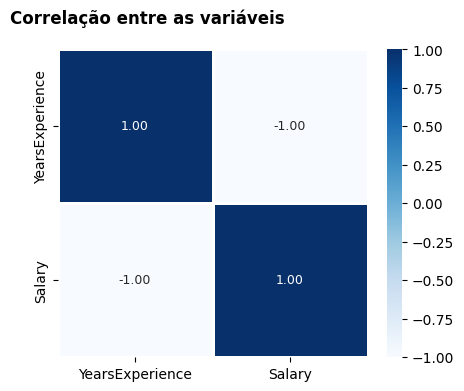

In [6]:
numeric_features = df.select_dtypes(include=['number']).columns
corr = df[numeric_features].corr()

plt.rcParams['figure.figsize'] =(5, 4)
sns.heatmap(corr.corr(), annot=True, cmap='Blues', linewidths=2, fmt='.2f',
            annot_kws={"size": 9})
plt.suptitle('Correlação entre as variáveis', fontweight='heavy',
             x=0.03, y=0.98, ha="left", fontsize='12',
             fontfamily='sans-serif', color="black")
plt.show()

<Figure size 500x400 with 0 Axes>

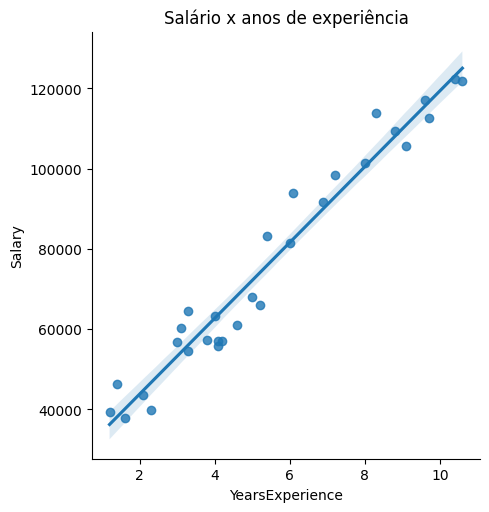

In [7]:
plt.figure(figsize=(5, 4))
sns.lmplot(x= 'YearsExperience', y= 'Salary', data=df)
plt.title('Salário x anos de experiência')
plt.show()

Os dados de fato se relacionam.

#### Visualização de distribuição:

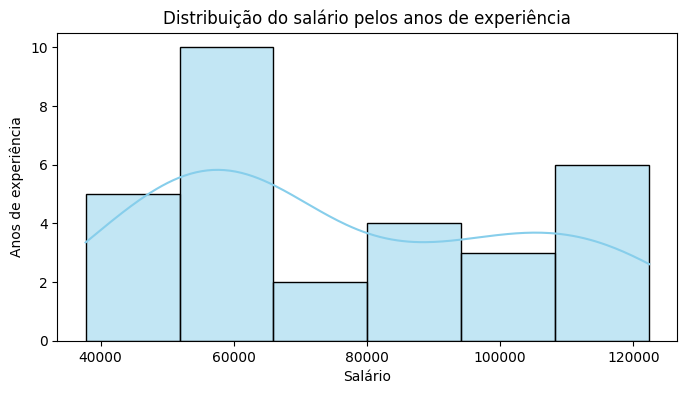

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(data=df, x='Salary', kde=True, color='skyblue')
plt.title('Distribuição do salário pelos anos de experiência')
plt.xlabel('Salário')
plt.ylabel('Anos de experiência')
plt.show()

Distribuição assimétrica.

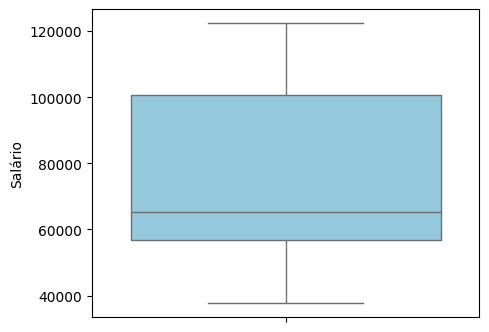

In [9]:
plt.figure(figsize=(5, 4))
sns.boxplot(data = df, y='Salary', color='skyblue')
plt.ylabel('Salário')
plt.show()

Não temos outliers, podemos seguir para os nossos testes.

#### Treino e teste do modelo:

In [10]:
x = df[['YearsExperience']] #variável independente
y = df[['Salary']] # variável dependente
SEED = 20

#dividindo em treino e teste
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state = SEED,
                                                        test_size = 0.2)

#treinando o modelo
MODEL = LinearRegression()
MODEL.fit(X_train, y_train)

LinearRegression()

In [11]:
print(f'O tamanho do x_train é {len(X_train)}')
print(f'O tamanho do y_train é {len(y_train)}')
print(f'O tamanho do x_test é {len(X_test)}')
print(f'O tamanho do y_test é {len(y_test)}')

O tamanho do x_train é 24
O tamanho do y_train é 24
O tamanho do x_test é 6
O tamanho do y_test é 6


#### MSE e MAE do modelo:

In [12]:
y_pred = MODEL.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"MSE (Erro Quadrático Médio): {mse:.2f}")
print(f"MAE (Erro Absoluto Médio): {mae:.2f}")

MSE (Erro Quadrático Médio): 40458438.74
MAE (Erro Absoluto Médio): 5680.94


#### R² score do modelo:

In [13]:
score_train = MODEL.score(X_train, y_train)
print(f"Treino R²: {score_train * 100:.2f}%")

Treino R²: 95.69%


In [14]:
score_test = MODEL.score(X_test, y_test)
print(f"Teste R²: {score_test * 100:.2f}%")

Teste R²: 94.41%


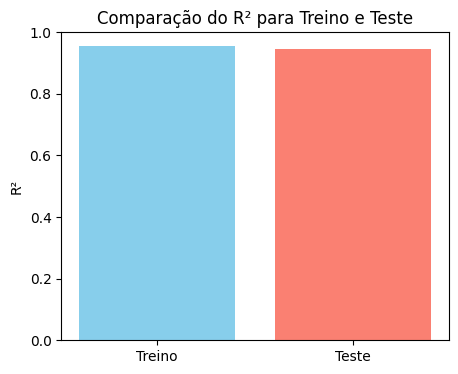

In [20]:
r2_values = [score_train, score_test]
labels = ['Treino', 'Teste']

plt.figure(figsize=(5, 4))
plt.bar(labels, r2_values, color=['skyblue', 'salmon'])
plt.ylim(0, 1)
plt.title('Comparação do R² para Treino e Teste')
plt.ylabel('R²')
plt.show()

***Treino R²:*** 95.6% da variabilidade dos dados de treinamento, o que é excelente.

***Teste R²:*** 94.4% da variabilidade dos dados de teste, indicando um bom desempenho fora do conjunto de treinamento.

#### Previsão de salários de acordo com os anos de experiência (novos valores)

In [16]:
new_df = np.array([0.3, 6, 13, 15, 2.7]).reshape(-1, 1)
salary_predictions = MODEL.predict(new_df)

print("Previsão de novos salários por anos de experiência:")
for years, salary in zip(new_df.flatten(), salary_predictions):
    print(f"Anos de experiência: {years}, Salário previsto: {float(salary):.0f}")

Previsão de novos salários por anos de experiência:
Anos de experiência: 0.3, Salário previsto: 28090
Anos de experiência: 6.0, Salário previsto: 82197
Anos de experiência: 13.0, Salário previsto: 148645
Anos de experiência: 15.0, Salário previsto: 167630
Anos de experiência: 2.7, Salário previsto: 50872


#### Visualização das previsões:

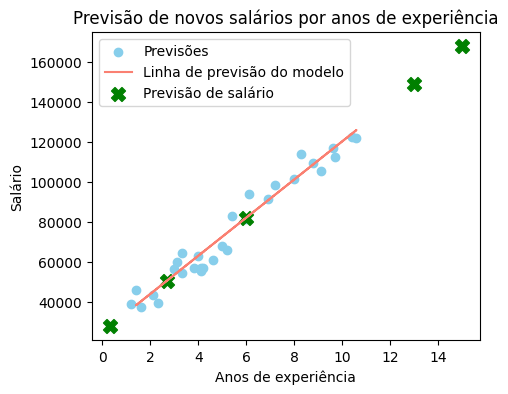

In [17]:
#visualização das previsões
plt.figure(figsize=(5, 4))
plt.scatter(df['YearsExperience'], df['Salary'], label="Previsões", color="skyblue")
plt.plot(X_test, y_pred, color="salmon", label="Linha de previsão do modelo")

plt.scatter(new_df, salary_predictions, color="green", label="Previsão de salário", marker="X", s=100)
plt.xlabel('Anos de experiência')
plt.ylabel('Salário')
plt.title('Previsão de novos salários por anos de experiência')
plt.legend()
plt.show()